In [46]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

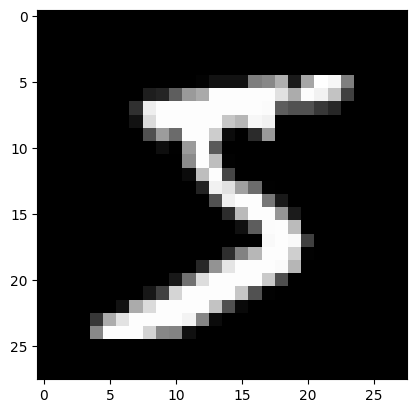

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

y_train_onehot.shape

(60000, 10)

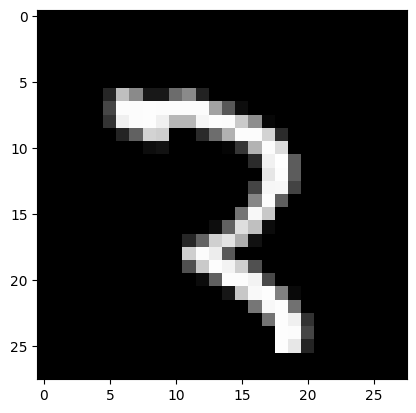

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')


In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
input = keras.Input(shape=(28,28,1))
model.add(input)

In [45]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 29s 30ms/step - loss: 0.2720 - accuracy: 0.9174 - val_loss: 0.0830 - val_accuracy: 0.9732
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0722 - accuracy: 0.9787 - val_loss: 0.0581 - val_accuracy: 0.9824
Epoch 3/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0522 - accuracy: 0.9838 - val_loss: 0.0546 - val_accuracy: 0.9830
Epoch 4/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0384 - val_accuracy: 0.9887
Epoch 5/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0502 - val_accuracy: 0.9849


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.272014,0.917433,0.083010,0.9732
1,0.072215,0.978700,0.058088,0.9824
2,0.052219,0.983833,0.054603,0.9830
3,0.043043,0.986417,0.038394,0.9887
4,0.035113,0.988733,0.050175,0.9849


<Axes: >

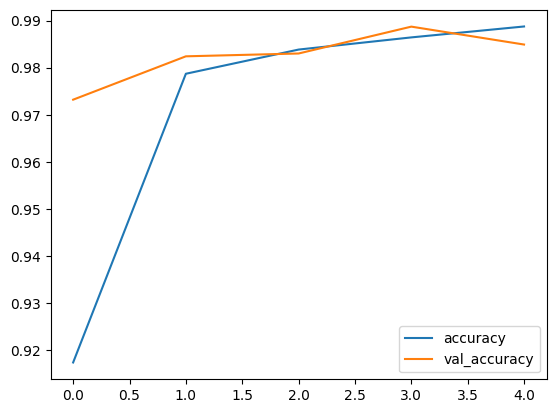

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

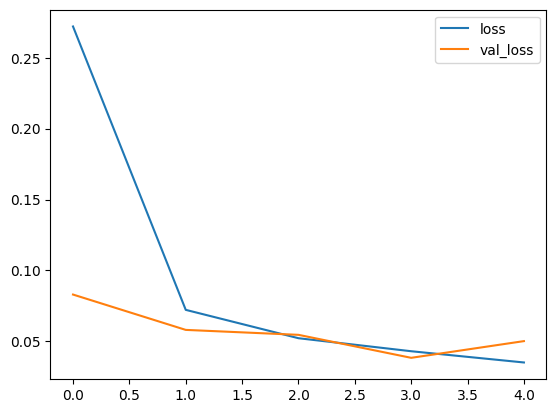

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 972    0    3    0    0    1    2    1    1    0]
 [   0 1129    3    1    0    0    0    2    0    0]
 [   1    2 1026    0    0    0    0    3    0    0]
 [   0    0    3 1006    0    0    0    0    1    0]
 [   1    0    2    0  971    0    3    0    0    5]
 [   2    0    0   16    0  872    1    0    1    0]
 [   5    2    1    0    1    2  946    0    1    0]
 [   0    2    7    0    0    0    0 1018    1    0]
 [   6    0   13    3    1    3    2    6  936    4]
 [   2    3    1    7    8    7    0    8    0  973]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



In [ ]:
img = image.load_img('/content/ip.png')

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('/content/ip.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [ ]:
print(x_single_prediction)

[7]


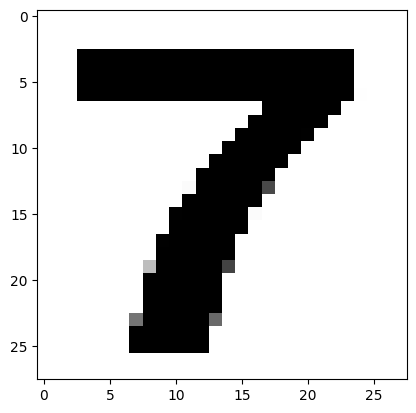

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 110ms/step


In [ ]:
print(x_single_prediction)

[7]
